[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/04_Weight_Initialization_MNIST_Classificaiton_.ipynb)

In [1]:
!git clone https://github.com/Intoli/intoli-article-materials.git

Cloning into 'intoli-article-materials'...
remote: Counting objects: 583, done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 583 (delta 0), reused 2 (delta 0), pack-reused 576
Receiving objects: 100% (583/583), 455.19 KiB | 5.29 MiB/s, done.
Resolving deltas: 100% (287/287), done.


In [2]:
cd intoli-article-materials/articles/neural-network-initialization

/content/intoli-article-materials/articles/neural-network-initialization


In [3]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import fashion_mnist
%matplotlib inline

Using TensorFlow backend.


In [0]:
from utils import (compile_model, create_mlp_model, get_activations, grid_axes_it,get_init_id, LossHistory,create_cnn_model)

In [0]:
seed = 10

n_train = 1000
n_test = 100
n_classes = 10

n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 30

n_train = 60000
n_test = 10000

In [6]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28*28

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.reshape(60000,784).astype('float32')[:n_train]
x_test = x_test.reshape(10000,784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Linear Function Sigma Compare

compare different settings of sigma by deploying a simle linear function

In [0]:
rows =[]
sigmas = [0.01,0.03, 0.05, 0.20,0.5,1]
for stddev in sigmas:
  init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
  activation = 'linear'
  
  model = create_mlp_model(n_hidden_layers,
                          dim_layer,
                          (data_dim,),
                          n_classes,
                          init,
                          'zeros',
                          activation)
  compile_model(model)
  output_elts = get_activations(model, x_test)
  n_layers = len(model.layers)
  i_output_layer = n_layers - 1
  
  for i, out in enumerate(output_elts[:-1]):
    if i>0 and i != i_output_layer:
      for out_i in out.ravel()[::20]:
        rows.append([i, stddev, out_i])

In [0]:
df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


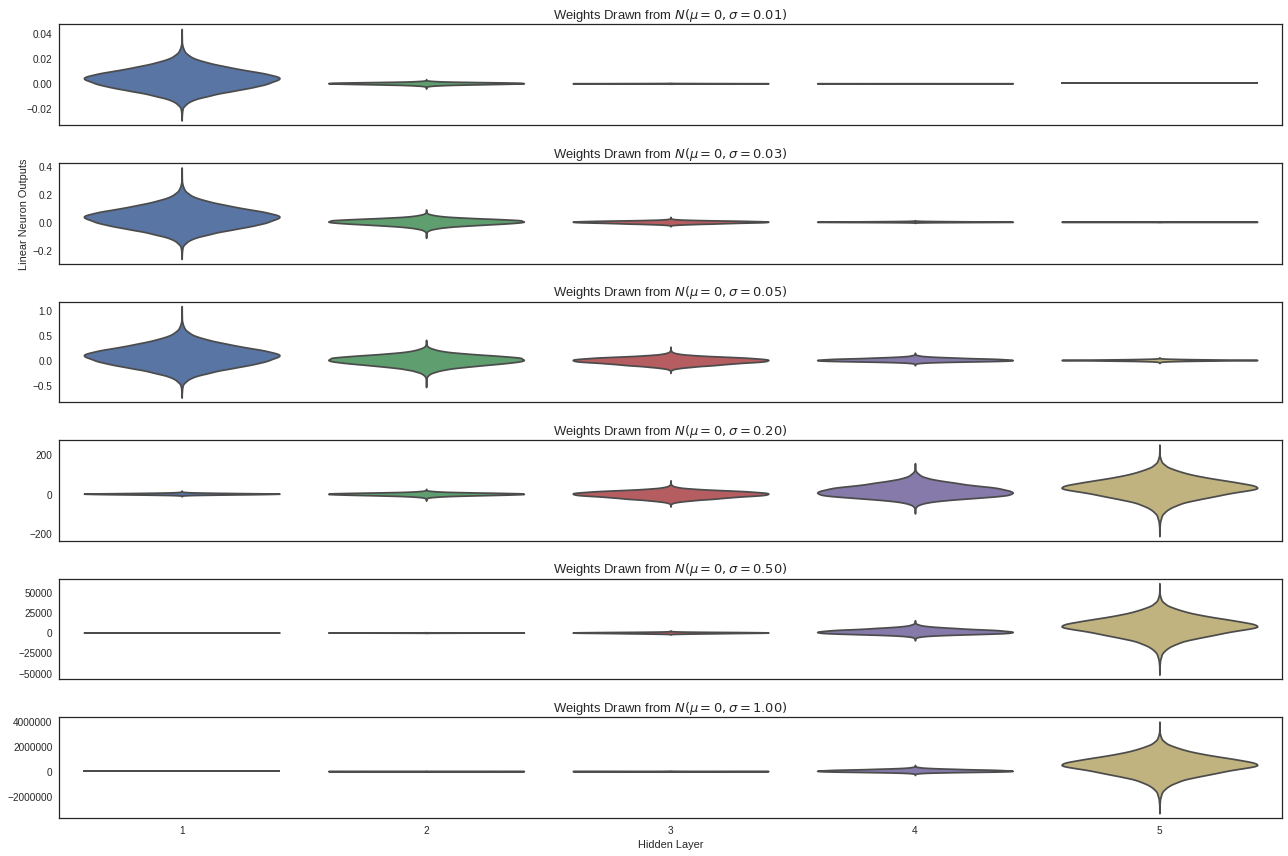

In [16]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(18,12))
axes = grid_axes_it(len(sigmas),1, fig=fig)
for sig in sigmas:
  ax = next(axes)
  ddf = df[df['Standard Deviation']==sig]
  sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count',inner=None)
  
  ax.set_xlabel('')
  ax.set_ylabel('')
  
  ax.set_title('Weights Drawn from $N(\mu=0, \sigma={%.2f})$' % sig, fontsize=13)
  
  if sig == sigmas[1]:
    ax.set_ylabel("Linear Neuron Outputs")
  if sig != sigmas[-1]:
    ax.set_xticklabels(())
  else:
    ax.set_xlabel("Hidden Layer")
    
    
plt.tight_layout()
plt.show()



---



---



## ReLU function sigma compare

Evalution the Setting of He Initialization by n=100

In [0]:
rows =[]
sigmas = [0.1,0.14,0.28]
for stddev in sigmas:
  init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
  activation = 'relu'
  
  model = create_mlp_model(n_hidden_layers,
                          dim_layer,
                          (data_dim,),
                          n_classes,
                          init,
                          'zeros',
                          activation)
  compile_model(model)
  output_elts = get_activations(model, x_test)
  n_layers = len(model.layers)
  i_output_layer = n_layers - 1
  
  for i, out in enumerate(output_elts[:-1]):
    if i>0 and i != i_output_layer:
      for out_i in out.ravel()[::20]:
        rows.append([i, stddev, out_i])

In [0]:
df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


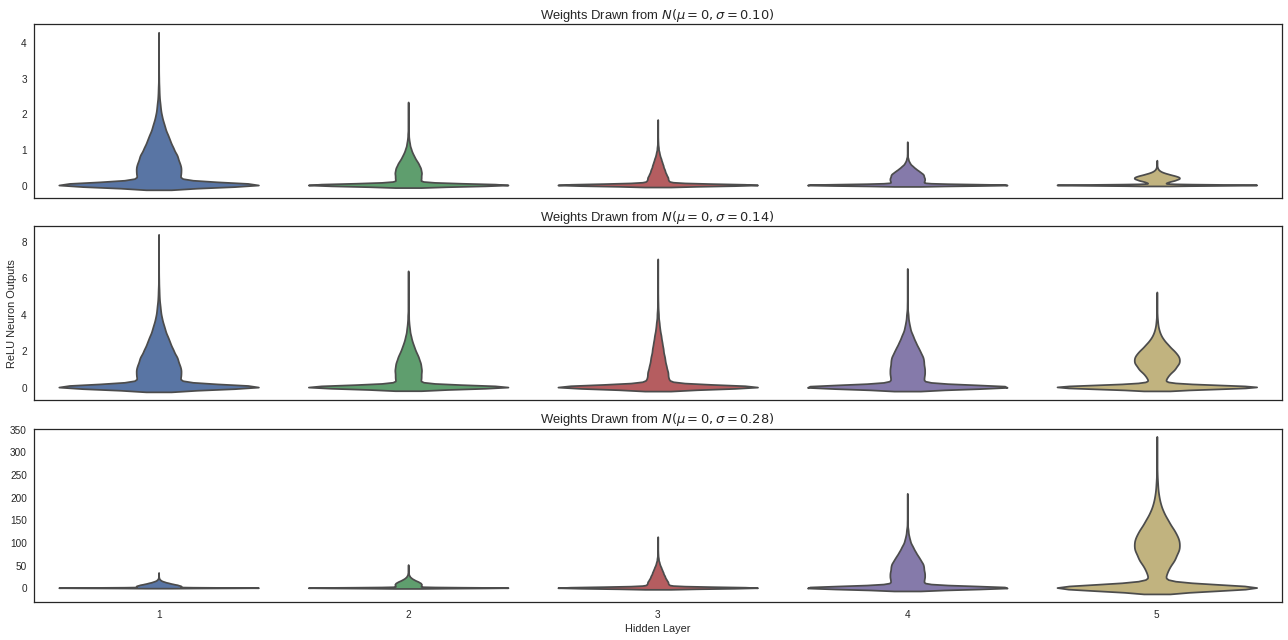

In [55]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(18,9))
axes = grid_axes_it(len(sigmas),1, fig=fig)
for sig in sigmas:
  ax = next(axes)
  ddf = df[df['Standard Deviation']==sig]
  sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count',inner=None)
  
  ax.set_xlabel('')
  ax.set_ylabel('')
  
  ax.set_title('Weights Drawn from $N(\mu=0, \sigma={%.2f})$' % sig, fontsize=13)
  
  if sig == sigmas[1]:
    ax.set_ylabel("ReLU Neuron Outputs")
  if sig != sigmas[-1]:
    ax.set_xticklabels(())
  else:
    ax.set_xlabel("Hidden Layer")
    
    
plt.tight_layout()
plt.show()

## Plot Loss Compare of using diffrent settings weights

In [0]:
%matplotlib inline
plt.style.use('seaborn-white')
sns.set_palette('colorblind')

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28,28

In [7]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

4423680/4422102 [==============================] - 4s 1us/step


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
inits = [
    initializers.Zeros(),
    initializers.RandomNormal(mean=0.0, stddev=0.4, seed=10),
    # he normal
    initializers.VarianceScaling(
        scale=2.0, mode='fan_in', distribution='normal', seed=10),
]

loss_histories = {}
models = {}

In [12]:
for i, init in enumerate(inits):
  init_id = get_init_id(init)
  print("Training CNN with initializers:")
  print(' ' + str(init))
  print(' ' + str(init.get_config()))
  
  model = create_cnn_model(input_shape, num_classes, kernel_initializer=init)
  compile_model(model)
  
  loss_history = LossHistory()
  model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=30,
           verbose=2,
           validation_data=(x_test,y_test),
           callbacks=[loss_history])
  losses = loss_history.losses
  
  loss_histories[init_id] = loss_history
  models[init_id] = model

Training CNN with initializers:
 {}
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 11s - loss: 2.3027 - acc: 0.0994 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/30
 - 9s - loss: 2.3027 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/30
 - 9s - loss: 2.3027 - acc: 0.0974 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/30
 - 9s - loss: 2.3027 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/30
 - 9s - loss: 2.3027 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/30
 - 9s - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/30
 - 9s - loss: 2.3027 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 8/30
 - 9s - loss: 2.3027 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 9/30
 - 9s - loss: 2.3027 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 10/30
 - 9s - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 11/30
 - 9s - loss: 2.3027 - acc: 0.0972 - val_loss: 2.3026 - val_acc: 0.100

Epoch 3/30
 - 9s - loss: 8.4902 - acc: 0.4702 - val_loss: 7.3423 - val_acc: 0.5429
Epoch 4/30
 - 9s - loss: 7.7851 - acc: 0.5147 - val_loss: 7.2856 - val_acc: 0.5470
Epoch 5/30
 - 9s - loss: 7.5632 - acc: 0.5289 - val_loss: 7.2464 - val_acc: 0.5496
Epoch 6/30
 - 9s - loss: 7.4592 - acc: 0.5350 - val_loss: 7.2846 - val_acc: 0.5468
Epoch 7/30
 - 9s - loss: 7.3434 - acc: 0.5417 - val_loss: 7.1484 - val_acc: 0.5547
Epoch 8/30
 - 9s - loss: 7.3242 - acc: 0.5432 - val_loss: 6.9180 - val_acc: 0.5690
Epoch 9/30
 - 9s - loss: 7.1902 - acc: 0.5517 - val_loss: 7.0769 - val_acc: 0.5598
Epoch 10/30
 - 9s - loss: 6.8882 - acc: 0.5697 - val_loss: 5.5423 - val_acc: 0.6531
Epoch 11/30
 - 9s - loss: 6.0941 - acc: 0.6185 - val_loss: 5.5442 - val_acc: 0.6530
Epoch 12/30
 - 9s - loss: 5.9473 - acc: 0.6279 - val_loss: 5.4665 - val_acc: 0.6585
Epoch 13/30
 - 9s - loss: 5.8771 - acc: 0.6322 - val_loss: 5.3105 - val_acc: 0.6684
Epoch 14/30
 - 9s - loss: 5.7381 - acc: 0.6412 - val_loss: 5.2950 - val_acc: 0.6680

 - 9s - loss: 0.2305 - acc: 0.9187 - val_loss: 0.2459 - val_acc: 0.9168
Epoch 7/30
 - 9s - loss: 0.2265 - acc: 0.9224 - val_loss: 0.2606 - val_acc: 0.9131
Epoch 8/30
 - 9s - loss: 0.2245 - acc: 0.9227 - val_loss: 0.2491 - val_acc: 0.9175
Epoch 9/30
 - 9s - loss: 0.2181 - acc: 0.9256 - val_loss: 0.2392 - val_acc: 0.9194
Epoch 10/30
 - 9s - loss: 0.2157 - acc: 0.9259 - val_loss: 0.2603 - val_acc: 0.9190
Epoch 11/30
 - 9s - loss: 0.2154 - acc: 0.9273 - val_loss: 0.2535 - val_acc: 0.9177
Epoch 12/30
 - 9s - loss: 0.2194 - acc: 0.9265 - val_loss: 0.2608 - val_acc: 0.9116
Epoch 13/30
 - 9s - loss: 0.2111 - acc: 0.9290 - val_loss: 0.2594 - val_acc: 0.9183
Epoch 14/30
 - 9s - loss: 0.2181 - acc: 0.9278 - val_loss: 0.2974 - val_acc: 0.9192
Epoch 15/30
 - 9s - loss: 0.2145 - acc: 0.9280 - val_loss: 0.2552 - val_acc: 0.9219
Epoch 16/30
 - 9s - loss: 0.2190 - acc: 0.9270 - val_loss: 0.2795 - val_acc: 0.9182
Epoch 17/30
 - 9s - loss: 0.2255 - acc: 0.9256 - val_loss: 0.2683 - val_acc: 0.9193
Epoch 1

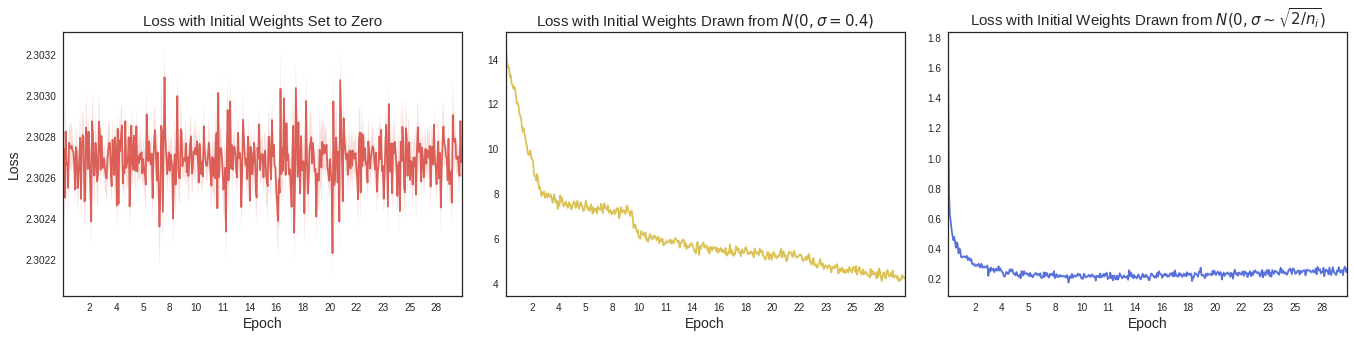

In [16]:
# Plot the loss over time for three initialization schemes.
colors = sns.color_palette('hls', 8)
cases = [
    (
        'Zeros|',
        'Loss with Initial Weights Set to Zero',
        colors[0],
    ),
    (
        'RandomNormal|mean-0.0__stddev-0.4',
        'Loss with Initial Weights Drawn from $N(0, \sigma = 0.4)$',
        colors[1],
    ),
   (
        'VarianceScaling|scale-2.0__mode-fan_in__distribution-normal',
        'Loss with Initial Weights Drawn from $N(0, \sigma \sim \sqrt{2/n_i})$',
        colors[5],
    ),
    
]

plt.figure(figsize=(12, 6))
axes = grid_axes_it(3,3)

for i, (case_id, label, color) in enumerate(cases):
    ax = next(axes)
    case_loss = loss_histories[case_id].losses
    n_steps = 30
    pseqs = []
    for step in range(n_steps):
        seq = [float(x) for x in case_loss[step::n_steps]]
        pseqs.append(seq)

    mlen = max([len(x) for x in pseqs])
    seqs = [np.array(seq[:mlen]) for seq in pseqs]

    sns.tsplot(np.array(seqs), ax=ax, color=color)

    # These plotting methos assume that there are 12 epochs to correctly draw xticks.
    #assert epochs == 50

    def get_label(x):
        if x == 0.0:
            return ''
        else:
            return str(int(x / len(seqs[0]) * 30))

    xticks = [x * len(seq) / 15.0 for x in range(15)]
    ax.set_xticks(xticks)
    ax.set_xticklabels([get_label(x) for x in xticks])

    if i < 100:
        ax.set_xlabel("Epoch", fontsize=14)
    if i == 0:
        ax.set_ylabel("Loss", fontsize=14)
    ax.set_title(label, fontsize=15)


plt.tight_layout()
plt.show()

## Plot Accuracy Compare of using diffrent settings weights

In [0]:
class AccHistory(keras.callbacks.Callback):
    """A custom keras callback for recording losses during network training."""

    def on_train_begin(self, logs={}):
        self.acces = []
        self.epoch_acces = []
        self.epoch_val_acces = []

    def on_batch_end(self, batch, logs={}):
        self.acces.append(logs.get('acc'))

    def on_epoch_end(self, epoch, logs={}):
        self.epoch_acces.append(logs.get('acc'))
        self.epoch_val_acces.append(logs.get('val_acc'))

In [0]:
inits = [
    initializers.Zeros(),
    initializers.RandomNormal(mean=0.0, stddev=0.4, seed=10),
    # he normal
    initializers.VarianceScaling(
        scale=2.0, mode='fan_in', distribution='normal', seed=10),
]

acc_histories = {}
models = {}

In [20]:
for i, init in enumerate(inits):
  init_id = get_init_id(init)
  print("Training CNN with initializers:")
  print(' ' + str(init))
  print(' ' + str(init.get_config()))
  
  model = create_cnn_model(input_shape, num_classes, kernel_initializer=init)
  compile_model(model)
  
  acc_history = AccHistory()
  model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=30,
           verbose=2,
           validation_data=(x_test,y_test),
           callbacks=[acc_history])
  acces = acc_history.acces
  
  acc_histories[init_id] = acc_history
  models[init_id] = model

Training CNN with initializers:
 {}
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 9s - loss: 2.3027 - acc: 0.0994 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/30
 - 9s - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/30
 - 9s - loss: 2.3027 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/30
 - 9s - loss: 2.3027 - acc: 0.0960 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/30
 - 9s - loss: 2.3027 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/30
 - 9s - loss: 2.3027 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/30
 - 9s - loss: 2.3027 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 8/30
 - 9s - loss: 2.3027 - acc: 0.0996 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 9/30
 - 9s - loss: 2.3027 - acc: 0.0994 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 10/30
 - 9s - loss: 2.3027 - acc: 0.0992 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 11/30
 - 9s - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1000

Epoch 3/30
 - 9s - loss: 8.7695 - acc: 0.4531 - val_loss: 7.3428 - val_acc: 0.5433
Epoch 4/30
 - 9s - loss: 7.8399 - acc: 0.5111 - val_loss: 7.3095 - val_acc: 0.5452
Epoch 5/30
 - 9s - loss: 7.5905 - acc: 0.5272 - val_loss: 7.2138 - val_acc: 0.5516
Epoch 6/30
 - 9s - loss: 7.5431 - acc: 0.5302 - val_loss: 7.2279 - val_acc: 0.5512
Epoch 7/30
 - 9s - loss: 7.4798 - acc: 0.5342 - val_loss: 7.2143 - val_acc: 0.5512
Epoch 8/30
 - 9s - loss: 7.3371 - acc: 0.5433 - val_loss: 7.1405 - val_acc: 0.5564
Epoch 9/30
 - 9s - loss: 7.3219 - acc: 0.5443 - val_loss: 7.0851 - val_acc: 0.5592
Epoch 10/30
 - 9s - loss: 7.3200 - acc: 0.5444 - val_loss: 7.1644 - val_acc: 0.5545
Epoch 11/30
 - 9s - loss: 7.2488 - acc: 0.5488 - val_loss: 7.1163 - val_acc: 0.5576
Epoch 12/30
 - 9s - loss: 6.6049 - acc: 0.5884 - val_loss: 5.8084 - val_acc: 0.6383
Epoch 13/30
 - 9s - loss: 5.9753 - acc: 0.6272 - val_loss: 5.6627 - val_acc: 0.6477
Epoch 14/30
 - 9s - loss: 5.8614 - acc: 0.6344 - val_loss: 5.6424 - val_acc: 0.6489

 - 9s - loss: 0.2375 - acc: 0.9177 - val_loss: 0.2453 - val_acc: 0.9151
Epoch 7/30
 - 9s - loss: 0.2329 - acc: 0.9201 - val_loss: 0.2823 - val_acc: 0.9155
Epoch 8/30
 - 9s - loss: 0.2303 - acc: 0.9210 - val_loss: 0.3008 - val_acc: 0.9164
Epoch 9/30
 - 9s - loss: 0.2273 - acc: 0.9228 - val_loss: 0.2624 - val_acc: 0.9130
Epoch 10/30
 - 9s - loss: 0.2290 - acc: 0.9226 - val_loss: 0.2565 - val_acc: 0.9180
Epoch 11/30
 - 9s - loss: 0.2243 - acc: 0.9238 - val_loss: 0.2909 - val_acc: 0.9172
Epoch 12/30
 - 9s - loss: 0.2266 - acc: 0.9226 - val_loss: 0.2562 - val_acc: 0.9183
Epoch 13/30
 - 9s - loss: 0.2243 - acc: 0.9254 - val_loss: 0.2642 - val_acc: 0.9179
Epoch 14/30
 - 9s - loss: 0.2261 - acc: 0.9247 - val_loss: 0.2413 - val_acc: 0.9194
Epoch 15/30
 - 9s - loss: 0.2312 - acc: 0.9232 - val_loss: 0.2998 - val_acc: 0.9165
Epoch 16/30
 - 9s - loss: 0.2312 - acc: 0.9240 - val_loss: 0.2889 - val_acc: 0.9194
Epoch 17/30
 - 9s - loss: 0.2325 - acc: 0.9224 - val_loss: 0.2520 - val_acc: 0.9164
Epoch 1

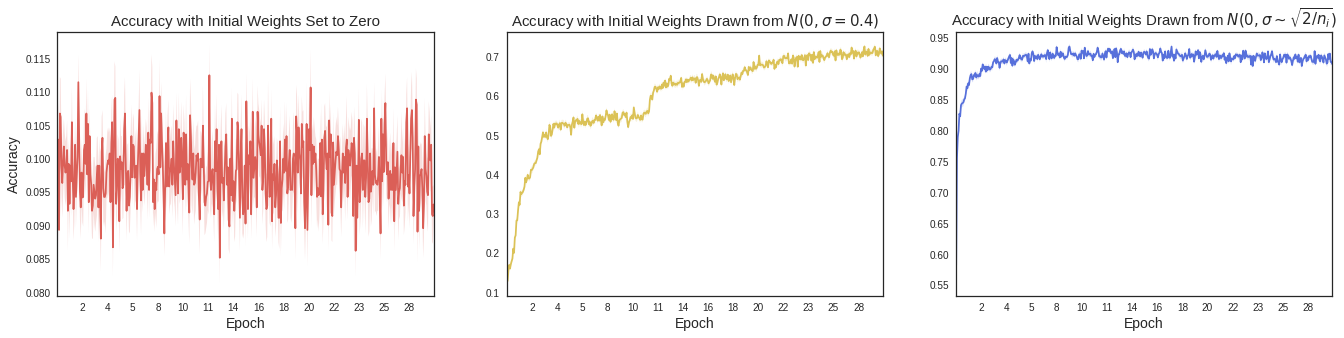

In [21]:
colors = sns.color_palette('hls', 8)
cases = [
    (
        'Zeros|',
        'Accuracy with Initial Weights Set to Zero',
        colors[0],
    ),
    (
        'RandomNormal|mean-0.0__stddev-0.4',
        'Accuracy with Initial Weights Drawn from $N(0, \sigma = 0.4)$',
        colors[1],
    ),
   (
        'VarianceScaling|scale-2.0__mode-fan_in__distribution-normal',
        'Accuracy with Initial Weights Drawn from $N(0, \sigma \sim \sqrt{2/n_i})$',
        colors[5],
    ),
    
]

plt.figure(figsize=(12, 6))
axes = grid_axes_it(3,3)

for i, (case_id, label, color) in enumerate(cases):
    ax = next(axes)
    case_acc = acc_histories[case_id].acces
    n_steps = 30
    pseqs = []
    for step in range(n_steps):
        seq = [float(x) for x in case_acc[step::n_steps]]
        pseqs.append(seq)

    mlen = max([len(x) for x in pseqs])
    seqs = [np.array(seq[:mlen]) for seq in pseqs]

    sns.tsplot(np.array(seqs), ax=ax, color=color)

    # These plotting methos assume that there are 12 epochs to correctly draw xticks.
    #assert epochs == 50

    def get_label(x):
        if x == 0.0:
            return ''
        else:
            return str(int(x / len(seqs[0]) * 30))

    xticks = [x * len(seq) / 15.0 for x in range(15)]
    ax.set_xticks(xticks)
    ax.set_xticklabels([get_label(x) for x in xticks])

    if i < 100:
        ax.set_xlabel("Epoch", fontsize=14)
    if i == 0:
        ax.set_ylabel("Accuracy", fontsize=14)
    ax.set_title(label, fontsize=15)


plt.tight_layout()
plt.show()